In [1]:
import pandas as pd
import numpy as np

In [63]:
data=pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [64]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [65]:
data.dropna(inplace=True)

In [66]:
data["Education Level"].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [67]:
data["Job Title"].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [68]:
dat_gender= pd.get_dummies(data['Gender'])

In [69]:
data = pd.concat([data, dat_gender], axis=1)

In [70]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Female,Male
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1,0
4,52.0,Male,Master's,Director,20.0,200000.0,0,1


In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [72]:
data['Education_Encoded'] = label_encoder.fit_transform(data["Education Level"])

In [73]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Female,Male,Education_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,0,1,1


In [74]:
col=["Gender","Education Level","Job Title"]

In [75]:
data.drop(col,axis=1,inplace=True)

In [76]:
data.head()

,Age,Years of Experience,Salary,Female,Male,Education_Encoded
0,32.0,5.0,90000.0,0,1,0
1,28.0,3.0,65000.0,1,0,1
2,45.0,15.0,150000.0,0,1,2
3,36.0,7.0,60000.0,1,0,0
4,52.0,20.0,200000.0,0,1,1


In [86]:
X = data.drop("Salary", axis=1)
y =data["Salary"].values.reshape(-1, 1)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (298, 5)
X_test shape: (75, 5)
y_train shape: (298, 1)
y_test shape: (75, 1)


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Data:")
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R^2 Score:", r2_train)

print("\nTesting Data:")
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R^2 Score:", r2_test)


Training Data:
Mean Squared Error (MSE): 233957642.67254525
Mean Absolute Error (MAE): 11529.093038244207
R^2 Score: 0.8982981351364052

Testing Data:
Mean Squared Error (MSE): 232595028.52964884
Mean Absolute Error (MAE): 10613.910121260107
R^2 Score: 0.9029876738433329


In [92]:
import pandas as pd
import numpy as np

# Assuming you have already trained your linear regression model on X_train and y_train

new_data_point = {
    'Age': 34,
    'Years of Experience': 4,
    "Gender": "Male",
    "Education Level": "PhD"
}

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([new_data_point])

# Preprocess the new data point to match the format of the training data
# Assuming you have applied one-hot encoding to the categorical variables in the training data

# Perform one-hot encoding on the categorical variables in the new data point
# Assuming you have the same categorical encoding applied to the training data
new_data_encoded = pd.get_dummies(new_data)

# Reorder the columns in the new_data_encoded DataFrame to match the order of columns in the training data
# Assuming you have the same column order in the training data and new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the new data
new_data_predictions = model.predict(new_data_encoded)

# Print the predicted salary
print(new_data_predictions)


[[67332.38736787]]


In [95]:
#	32.0	Male	Bachelor's	Software Engineer	5.0	90000.0
#28.0	Female	Master's	Data Analyst	3.0	65000.0	
new_data_point = {
    'Age': 28.0,
    'Gender': 'Female',
    'Education Level': "Master's",
    'Job Title': 'Data Analyst',
    'Years of Experience': 3.0
}

# Create a new DataFrame for the new data point
new_data = pd.DataFrame([new_data_point])

# Transform the categorical columns (Gender and Education Level)
new_data_transformed = pd.get_dummies(new_data)

# Make the salary prediction using the trained model
new_data_predictions = model.predict(new_data_transformed)

# Print the predicted salary
print("Predicted Salary:", new_data_predictions[0])


Predicted Salary: [59232.52784893]


C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Education Level_Master's
- Gender_Female
- Job Title_Data Analyst
Feature names seen at fit time, yet now missing:
- Education_Encoded
- Female
- Male

  warnings.warn(message, FutureWarning)


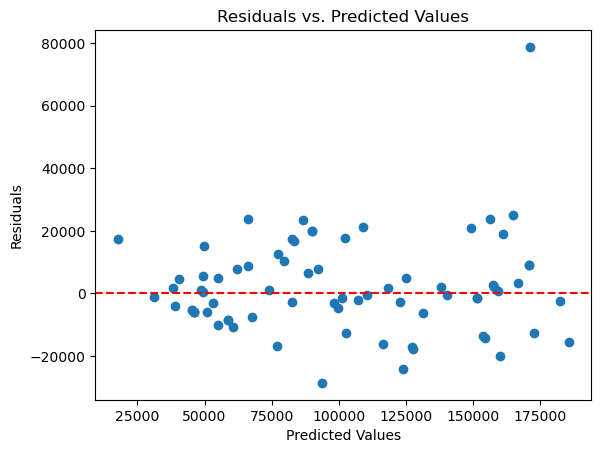

In [96]:
import matplotlib.pyplot as plt

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_test_pred

# Plot the residuals against the predicted values
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()
